In [1]:
import numpy as np
import pandas as pd

train_df = pd.read_table(r'input_data/train.tsv')
test_df = pd.read_table(r'input_data/test.tsv')

print(train_df.shape)


(1482535, 8)


In [2]:
train_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [3]:
test_df.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


In [4]:
train_df = train_df.drop(train_df[(train_df.price < 3.0)].index)
print(train_df.shape)
print(train_df['price'].max())
print(train_df['price'].min())

(1481661, 8)
2009.0
3.0


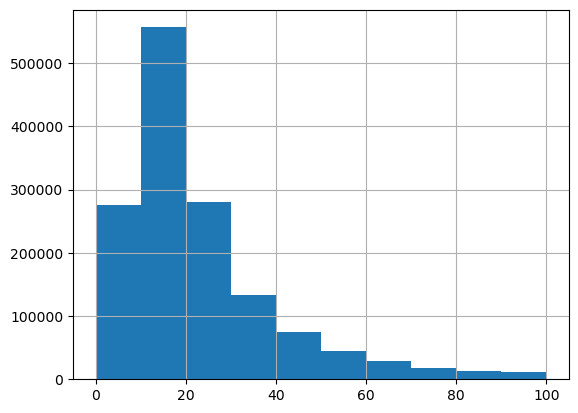

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

train_df['price'].hist(range=(0, 100))
plt.show()

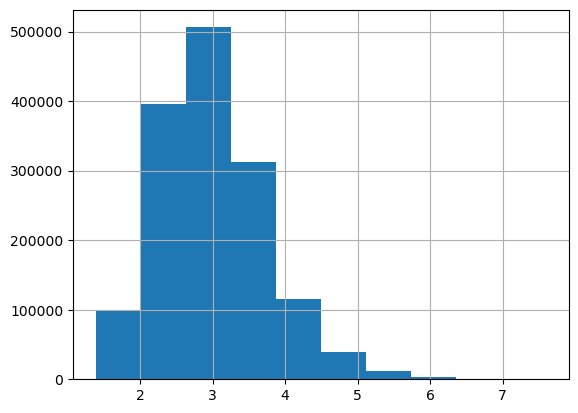

In [6]:
train_df['target'] = np.log1p(train_df.price)
train_df['target'].hist()
plt.show()

In [7]:
def split_cat(text):
    try: return text.split('/')
    except: return ('No Label', 'No Label', 'No Label')

train_df['subcat_0'], train_df['subcat_1'], train_df['subcat_2'] = zip(* train_df['category_name'].apply(lambda x: split_cat(x)))
test_df['subcat_0'], test_df['subcat_1'], test_df['subcat_2'] = zip(* test_df['category_name'].apply(lambda x:split_cat(x)))

In [8]:
train_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,target,subcat_0,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,2.397895,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,3.806662,Women,Jewelry,Necklaces


In [9]:
test_df.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description,subcat_0,subcat_1,subcat_2
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7,Women,Jewelry,Rings
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined...",Other,Office supplies,Shipping Supplies
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...,Vintage & Collectibles,Bags and Purses,Handbag
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...,Women,Sweaters,Cardigan
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...,Other,Books,Religion & Spirituality


In [10]:
full_set = pd.concat([train_df, test_df])

all_brands = set(full_set['brand_name'].values)

train_df['brand_name'].fillna(value='missing', inplace=True)
test_df['brand_name'].fillna(value='missing', inplace=True)

train_premissing = len(train_df.loc[train_df['brand_name'] == 'missing'])
test_premissing = len(test_df.loc[test_df['brand_name'] == 'missing'])

def brand_finder(line):
    brand = line[0]
    name = line[1]
    namesplit = name.split(' ')

    if brand == 'missing':
        for x in namesplit:
            if x in all_brands:
                return name
    if name in all_brands:
        return name
    
    return brand

train_df['brand_name'] = train_df[['brand_name', 'name']].apply(brand_finder, axis=1)
test_df['brand_name'] = test_df[['brand_name', 'name']].apply(brand_finder, axis=1)

train_len = len(train_df.loc[train_df['brand_name'] == 'missing'])
test_len = len(test_df.loc[test_df['brand_name'] == 'missing'])
train_found = train_premissing - train_len
test_found = test_premissing - test_len
print(train_premissing)
print(train_found)
print(test_premissing)
print(test_found)

632336
137342
295525
64154


In [11]:
train_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,target,subcat_0,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,MLB Cincinnati Reds T Shirt Size XL,10.0,1,No description yet,2.397895,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,missing,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,missing,44.0,0,Complete with certificate of authenticity,3.806662,Women,Jewelry,Necklaces


In [12]:
full_df = pd.concat([train_df, test_df], sort=False)


In [18]:
def fill_missing_values(df):
    df['category_name'].fillna(value='missing', inplace=True)
    df['brand_name'].fillna(value='missing', inplace=True)
    df['item_description'].fillna(value='missing', inplace=True)
    df['item_description'].replace('No description yet', 'missing', inplace=True)

    return df

full_df = fill_missing_values(full_df)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(full_df.category_name)
full_df['category'] = le.transform(full_df.category_name)

le.fit(full_df.brand_name)
full_df.brand_name = le.transform(full_df.brand_name)

le.fit(full_df.subcat_0)
full_df.subcat_0 = le.transform(full_df.subcat_0)
